# Linear Regression with 1-Dimension 

In [48]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Initialization

In [49]:
X = np.array([[1.5, 2, 3.5, 5, 6.5, 7]]).T
Y = np.array([[-0.96, -2.71, -3.13, 2.26, 3.45, 2.06]]).T

## 2. Run Model

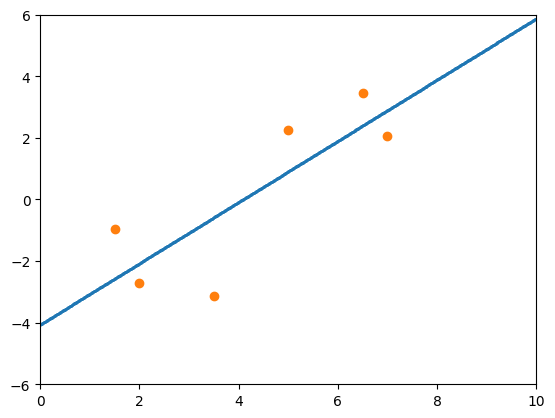

In [50]:
class LinearRegressionOneD:
    def __init__ (self,X,Y):
        XInt = np.hstack((np.ones((X.shape[0],1)), X))
        self.beta = np.linalg.pinv(XInt.T @ XInt) @ XInt.T @ Y

    def predict(self,x):
        beta = self.beta
        return beta[1][0]* x+ beta[0][0]

Xplot =np.linspace(0,10,1000)
li =LinearRegressionOneD(X,Y)
plt.xlim(0, 10)  
plt.ylim(-6, 6)
Yplot = [li.predict(x) for x in Xplot]
plt.scatter(Xplot,Yplot,s=1)
plt.scatter(X,Y)

# Linear Regression with N-Dimension

In [51]:
class LinearRegressor():
    def __init__(self, lr, epochs):
        self.__W = None
        self.__losses = []
        self.__lr = lr
        self.__epochs = epochs

    def _predict(self,X):
        return np.dot(X,self.__W)
    
    def predict(self,X): 
        X = np.hstack((np.ones((X.shape[0],1)), X))
        return self._predict(X)

    def _computeLoss(self, y, y_hat):
        return 1/(len(y)*2) * np.square(y_hat - y)

    def _computeGradient(self, X, y, y_hat):
        return 1/len(y) * np.dot(X.T,(y_hat-y))

    def _updateWeight(self, gradient):
        return self.__W - (self.__lr * gradient)

    def fit(self,X,y):
        self.__W = np.array([0] * (X.shape[1]+1))
        X = np.hstack([np.ones((len(X),1)),X])
        for epoch in range(self.__epochs):
            y_hat = self._predict(X)
            loss = self._computeLoss(y,y_hat)
            gradient = self._computeGradient(X,y,y_hat)
            self.__W = self._updateWeight(gradient)
            self.__losses.append(np.mean(loss))

    def parameters(self):
        return self.__W

    def losses(self):
        return self.__losses

## 1.Load dataset


In [52]:
df = pd.read_csv('../datasets/Advertising.csv')
df = df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 2. Normalize and split dataset into training and test set

In [53]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]

# Normal
scaler = StandardScaler()
X = scaler.fit_transform(X)
# split
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42,test_size=0.3)

## 3. Run model

Giá trị nhỏ nhất: 3.7798644797918586
Chỉ số learing rate tại đó: 0.05


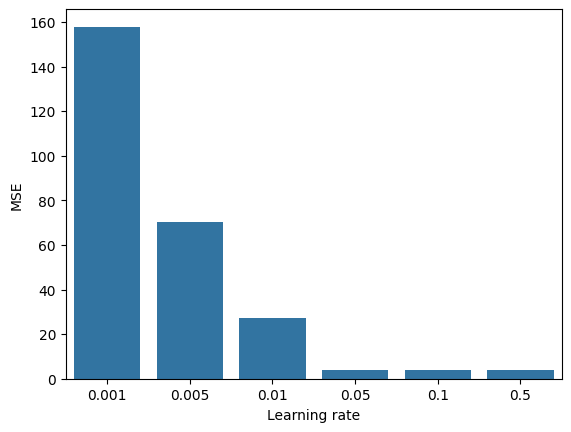

In [57]:
learning_rates = [0.001,0.005,0.01,0.05,0.1,0.5]
epochs = 100
mses = []
for lr in learning_rates:
    reg = LinearRegressor(lr=lr,epochs=epochs)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_val)
    mse = mean_squared_error(y_val,y_pred)
    mses.append(mse)
sns.barplot(x=learning_rates,y=mses)

mses = np.array(mses)
print(f"Giá trị nhỏ nhất: {np.min(mses)}")
print(f"Chỉ số learing rate tại đó: {learning_rates[ np.argmin(mses)]}")

plt.xlabel('Learning rate')
plt.ylabel('MSE')
plt.show()